## Install libs and gets weights

In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2023-04-20 14:30:16--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2023-04-20 14:30:16 (31.6 MB/s) - ‘coco.names’ saved [625/625]



In [ ]:
!wget https://pjreddie.com/media/files/yolov2.weights

--2023-04-20 14:30:16--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M  44.9MB/s    in 4.7s    

2023-04-20 14:30:21 (41.6 MB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov2.cfg

--2023-04-20 14:30:21--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov2.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2726 (2.7K) [text/plain]
Saving to: ‘yolov2.cfg’

yolov2.cfg          100%[===================>]   2.66K  --.-KB/s    in 0s      

2023-04-20 14:30:21 (39.6 MB/s) - ‘yolov2.cfg’ saved [2726/2726]



In [ ]:
!pip install plotbbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Load pretreined model

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from plotbbox import plotBBox
import matplotlib.pyplot as plt

In [ ]:
network = cv2.dnn.readNet('/content/yolov2.cfg', '/content/yolov2.weights')
network.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
layer_names = network.getLayerNames()
output_layers = [layer_names[i - 1] for i in network.getUnconnectedOutLayers()]

## Load test images and get boxes for predicted objects

In [ ]:
!wget http://images.cocodataset.org/val2017/000000397133.jpg
!wget http://images.cocodataset.org/val2017/000000174482.jpg
!wget http://images.cocodataset.org/val2017/000000502136.jpg


--2023-04-20 14:30:26--  http://images.cocodataset.org/val2017/000000397133.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.11.184, 3.5.29.251, 54.231.192.17, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.11.184|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200576 (196K) [image/jpeg]
Saving to: ‘000000397133.jpg’

000000397133.jpg    100%[===================>] 195.88K  --.-KB/s    in 0.01s   

2023-04-20 14:30:26 (13.3 MB/s) - ‘000000397133.jpg’ saved [200576/200576]

--2023-04-20 14:30:26--  http://images.cocodataset.org/val2017/000000174482.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.11.184, 3.5.29.251, 54.231.192.17, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.11.184|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207538 (203K) [image/jpeg]
Saving to: ‘000000174482.jpg’

000000174482.jpg    100%[===================>] 202.67K  --.-KB/s   

In [ ]:
sample1 = cv2.imread('/content/000000397133.jpg')
sample2 = cv2.imread('/content/000000174482.jpg')
sample3 = cv2.imread('/content/000000502136.jpg')

In [ ]:
def get_predictions(img):
  H, W = img.shape[:2]

  blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
  network.setInput(blob)
  label_table = open('/content/coco.names').read().strip().split('\n')
  color_table = list(np.random.randint(0, 255, size=(len(label_table), 3), dtype='uint8'))

  for output in network.forward(output_layers):
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > 0.5:
            xmin, ymin, xmax, ymax = get_coords(detection, W, H)
            plotBBox(img, xmin, ymin, xmax, ymax, color=[int(c) for c in color_table[classID]], thickness=1, label=label_table[classID]) # plot bounding box on img
           
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()  

In [ ]:
def get_coords(detection, W, H):
  center_x = int(detection[0] * W)
  center_y = int(detection[1] * H)
  w = int(detection[2] * W)
  h = int(detection[3] * H)
  xmin = int(center_x - w / 2)
  ymin = int(center_y - h / 2)
  xmax = int(center_x + w / 2)
  ymax = int(center_y + h / 2)
  return xmin, ymin, xmax, ymax

## Results

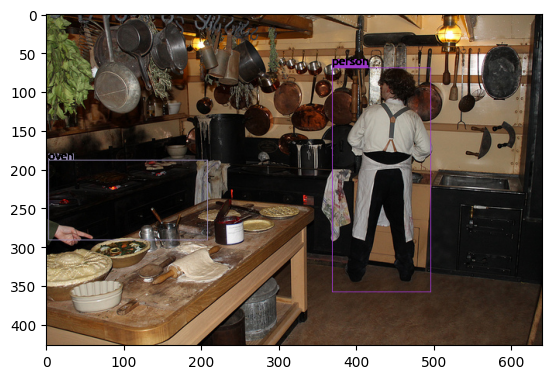

In [ ]:
get_predictions(sample1)

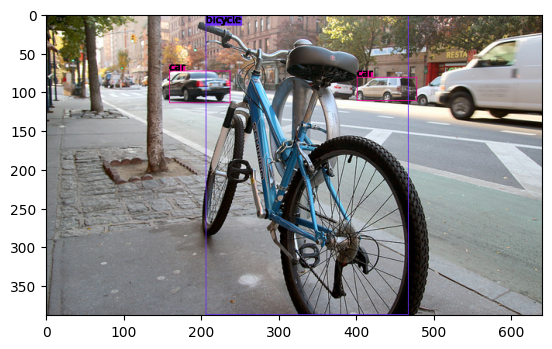

In [ ]:
get_predictions(sample2)

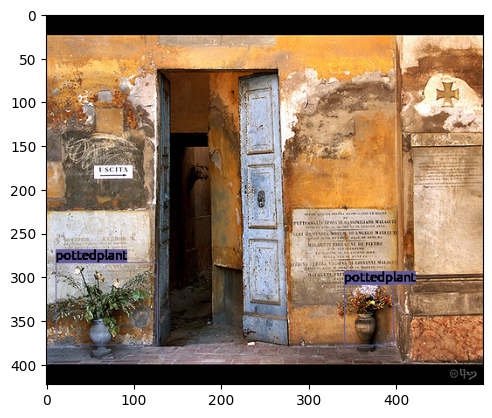

In [ ]:
get_predictions(sample3)